### Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd 'drive/Othercomputers/My Laptop (1)/MY COLLEGE/ISI KOLKATA/PROJECTS/IIT J Summer Internship 2022/Code/Neural-Uncertainty-Representation/'

[Errno 2] No such file or directory: 'drive/Othercomputers/My Laptop (1)/MY COLLEGE/ISI KOLKATA/PROJECTS/IIT J Summer Internship 2022/Code/Neural-Uncertainty-Representation/'
/content/drive/Othercomputers/My Laptop (1)/MY COLLEGE/ISI KOLKATA/PROJECTS/IIT J Summer Internship 2022/Code/Neural-Uncertainty-Representation


### Importing Necessary Packages

In [ ]:
!pip install phate
!pip install scprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import phate as ph
import pandas as pd
import scprep as scp
import matplotlib.pyplot as plt

## Loading the Data o Young Subjects

I have already prepared the BOLD Data of the following ROIs for young subjects in 3D-Tensor of dimenension (TR, Voxel, Number of Subjects):
- lOFC
- mOFC
- mPFC
- dmPFC
- vlPFC

In [30]:
data_lOFC = np.load('YOUNG/data_lOFC.npy')
data_mOFC = np.load('YOUNG/data_mOFC.npy')
data_mPFC = np.load('YOUNG/data_mPFC.npy')
data_dmPFC = np.load('YOUNG/data_dmPFC.npy')
data_vlPFC = np.load('YOUNG/data_vlPFC.npy')

We now find the BOLD data for all voxel and all the TRs averaged over the subjects.

In [31]:
data_lOFC_avg = np.mean(data_lOFC, axis=2)
data_mOFC_avg = np.mean(data_mOFC, axis=2)
data_mPFC_avg = np.mean(data_mPFC, axis=2)
data_dmPFC_avg = np.mean(data_dmPFC, axis=2)
data_vlPFC_avg = np.mean(data_vlPFC, axis=2)

In [32]:
data_lOFC_avg.shape

(189, 1700)

### PHATE Representation

In [28]:

# We now instantiate the PHATE operator(matrix)/object of the PHATE class
phate_op = ph.PHATE()
# PHATE requires Voxel x TR Data
phate_embd_mOFC =  phate_op.fit_transform(data_mOFC.T)


In [50]:
def plot_phate_rep(data, ax=None, title=""):
  # We now instantiate the PHATE operator(matrix)/object of the PHATE class
  phate_op = ph.PHATE(random_state=43, verbose=0)
  # PHATE requires Voxel x TR Data
  phate_embd =  phate_op.fit_transform(data)
  scp.plot.scatter2d(phate_embd, ax=ax, ticks=None, c = list(range(data.shape[0])), label_prefix='PHATE ', title=title)

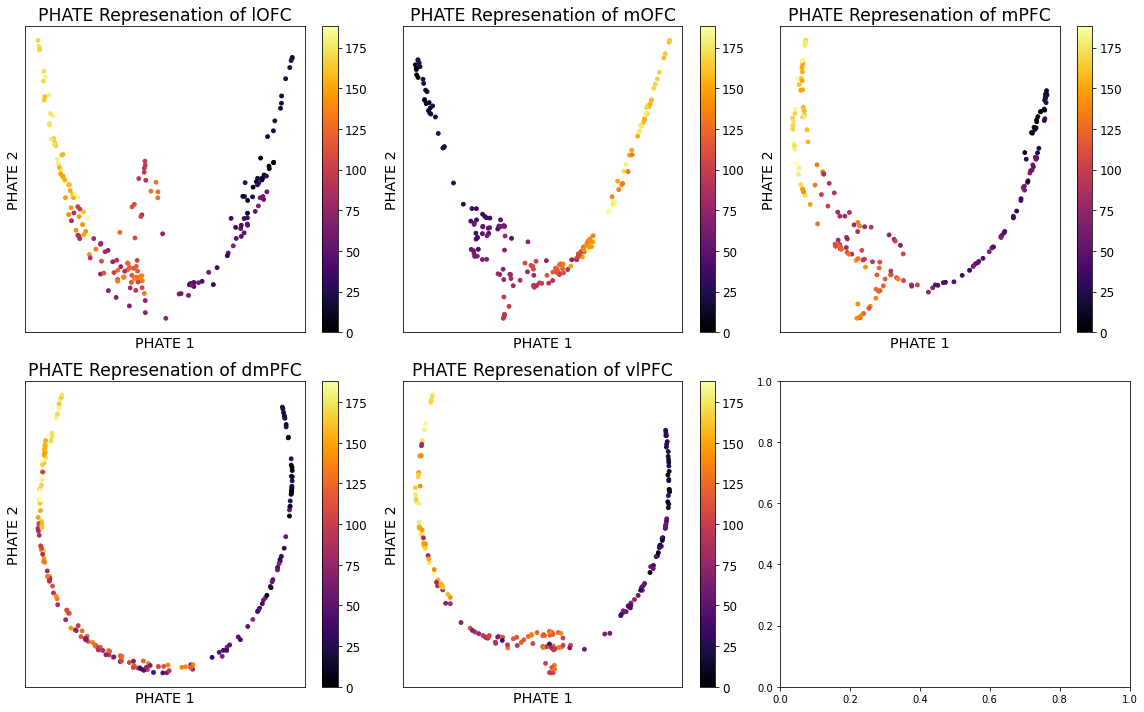

In [60]:
ROIs_data = [data_lOFC_avg, data_mOFC_avg, data_mPFC_avg, data_dmPFC_avg, data_vlPFC_avg]
ROIs = ["lOFC", "mOFC", "mPFC", "dmPFC", "vlPFC"]

fig, ax = plt.subplots(2,3, figsize=(16,10))
i = 0
for name, data in zip(ROIs, ROIs_data):
  plot_phate_rep(data, ax[min(max(0, i-2),1),i%3], "PHATE Represenation of "+ name)
  i += 1
  fig.tight_layout()

In [49]:
scp.plot.scatter2d?